# Cyclistic Bike-Share Analytics

<img src="logo.png" alt="Cyclistic" style="width: 390px; height: 340px;">

## 1. Introduction
This documentation covers the preliminary data preprocessing and analysis conducted on the Cyclistic bike-share dataset. The goal of this analysis was to understand how casual riders and annual members use bikes differently. This preliminary process sets the foundation for further analysis, including A/B testing and Time Series Analysis with SARIMA.

In [1]:
# Libraries for Data Handling and Visualization
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library
import matplotlib.ticker as ticker  # Customizing tick locations on plots

# Geospatial Visualization
import folium   # Library for creating interactive maps
from folium.plugins import HeatMap  # Plugin for creating heatmaps on Folium maps

# Statistical Tests and Time Series Analysis
from scipy.stats import ttest_ind  # Independent samples t-test
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test
from statsmodels.tsa.seasonal import seasonal_decompose  # Seasonal decomposition of time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # ACF and PACF plots
from itertools import product  # Cartesian product of input iterables
import statsmodels.api as sm  # Statistical models and tests

## 2. Data Loading and Concatenation
The first step is to load the bike trip data from multiple CSV files representing each month from July 2022 to June 2023. Each CSV file contains trip data for a specific month. The data from all months are concatenated into a single dataframe.

In [2]:
# Load the bike trip data from July 2022 to June 2023
jul22 = pd.read_csv('202207-divvy-tripdata.csv')
aug22 = pd.read_csv('202208-divvy-tripdata.csv')
sep22 = pd.read_csv('202209-divvy-tripdata.csv')
oct22 = pd.read_csv('202210-divvy-tripdata.csv')
nov22 = pd.read_csv('202211-divvy-tripdata.csv')
dec22 = pd.read_csv('202212-divvy-tripdata.csv')
jan23 = pd.read_csv('202301-divvy-tripdata.csv')
feb23 = pd.read_csv('202302-divvy-tripdata.csv')
mar23 = pd.read_csv('202303-divvy-tripdata.csv')
apr23 = pd.read_csv('202304-divvy-tripdata.csv')
may23 = pd.read_csv('202305-divvy-tripdata.csv')
jun23 = pd.read_csv('202306-divvy-tripdata.csv')

In [3]:
# Create a list of all the dataframes of each month
dataframes = [jul22, aug22, sep22, oct22, nov22, dec22, jan23, feb23, mar23, apr23, may23, jun23]

# Concatenate all the monthly dataframes into a single dataframe
data = pd.concat(dataframes, ignore_index=True)

In [4]:
# Peek at the first 10 rows of the data
data.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member
5,579D73BE2ED880B3,electric_bike,2022-07-01 17:04:35,2022-07-01 17:13:18,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.884614,-87.644564,41.867118,-87.641088,member
6,EFE518CCEE333669,classic_bike,2022-07-18 18:11:01,2022-07-18 18:22:30,Marquette Ave & 89th St,20239,East End Ave & 87th St,20231,41.733669,-87.558342,41.736815,-87.582801,member
7,315FEBB7B3F6D2EA,classic_bike,2022-07-28 20:38:18,2022-07-28 21:09:11,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,casual
8,EE3C4A1E66766B56,classic_bike,2022-07-10 22:55:59,2022-07-10 23:01:32,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,member
9,1EE6C93A547A187C,electric_bike,2022-07-10 09:35:58,2022-07-10 09:47:25,Ashland Ave & Blackhawk St,13224,Orleans St & Merchandise Mart Plaza,TA1305000022,41.907093,-87.667247,41.888243,-87.636390,member


It's important to get familiar with the dataset and the meaning of each column. The dataset comprises of the following columns:
- ride_id: A unique identifier for each bike ride.
- rideable_type: The type of bike used for the ride.
- started_at: The date and time when the ride began.
- ended_at: The date and time when the ride ended.
- start_station_name: The name of the station where the ride began.
- start_station_id: A unique identifier for the station where the ride began.
- end_station_name: The name of the station where the ride ended.
- end_station_id: A unique identifier for the station where the ride ended.
- start_lat: The latitude coordinate of the starting station's location.
- start_lng: The longitude coordinate of the starting station's location.
- end_lat: The latitude coordinate of the ending station's location.
- end_lng: The longitude coordinate of the ending station's location.
- member_casual: Indicates whether the rider is a 'member' (annual member) or 'casual' (casual rider).

In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779444 entries, 0 to 5779443
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 573.2+ MB


## 3. Data Cleaning
The dataset contains several columns, including information about trip start and end times, station locations, user type and more. Before analysis, some cleaning and preprocessing steps are performed:

### 3.1. Date and Time Conversion
The columns 'started_at' and 'ended_at' are converted to datetime objects, allowing for time-based analysis.

In [6]:
# Convert the started_at and ended_at columns to datetime objects
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

### 3.2. Duration Calculation and Zero Duration Removal
A 'duration' column is created by calculating the time difference between 'ended_at' and 'started_at' in seconds. Rows with zero or negative duration values (likely erroneous data) are removed.

In [7]:
# Calculate the duration of each trip and store it in a 'duration' column
data['duration'] = data['ended_at'] - data['started_at']

# Convert the duration column to timedelta format
data['duration'] = pd.to_timedelta(data['duration'])

# Extract the total seconds from the timedelta values for easier analysis
data['duration'] = data['duration'].dt.total_seconds()

In [8]:
# Display the updated dataframe
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,705.0
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,113.0
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,463.0
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,3509.0
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,1578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779439,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56,2023-06-30 13:41:25,Fairbanks Ct & Grand Ave,TA1305000003,California Ave & Milwaukee Ave,13084,41.891847,-87.620580,41.922695,-87.697153,casual,2549.0
5779440,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44,2023-06-29 20:09:15,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891970,-87.620198,41.890000,-87.610000,casual,751.0
5779441,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20,2023-06-25 00:39:09,Clark St & Lincoln Ave,13179,NaN,NaN,41.915745,-87.634604,41.920000,-87.650000,casual,709.0
5779442,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57,2023-06-24 21:28:44,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891725,-87.620607,41.890000,-87.620000,casual,107.0


In [9]:
# Check if there are any rows with trip duration less than or equal to zero
any(data['duration'] <= 0) == True

True

In [10]:
# Keep track of the number of rows before dropping
num_rows_before, num_cols = data.shape

# Remove rows with zero or negative trip duration
data = data[data['duration'] > 0]

# Calculate the number of dropped rows
num_rows_after, _ = data.shape
num_dropped_rows = num_rows_before - num_rows_after

# Print the number of rows dropped
print(f'Number of rows dropped: {num_dropped_rows}')

Number of rows dropped: 574


### 3.3. Distance Calculation and Zero Distance Removal
A 'distance_km' column is created by calculating the distance traveled for each trip using the Haversine formula. This prepares the data by calculating meaningful distances. Rows with zero distance are removed.

In [11]:
R = 6371

data['phi_1'] = np.radians(data['start_lat'])
data['phi_2'] = np.radians(data['end_lat'])
data['delta_phi'] = np.radians(data['end_lat'] - data['start_lat'])
data['delta_lambda'] = np.radians(data['end_lng'] - data['start_lng'])

# Haversine formula
data['a'] = np.sin(data['delta_phi'] / 2.0)**2 + np.cos(data['phi_1']) * np.cos(data['phi_2']) * np.sin(data['delta_lambda'] / 2.0)**2
data['c'] = 2 * np.arctan2(np.sqrt(data['a']), np.sqrt(1 - data['a']))

# Calculate distance
data['distance_km'] = R * data['c']

# Drop the intermediate columns
data.drop(['phi_1', 'phi_2', 'delta_phi', 'delta_lambda', 'a', 'c'], axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_20040\4196082394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['phi_1'] = np.radians(data['start_lat'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_20040\4196082394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['phi_2'] = np.radians(data['end_lat'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_20040\4196082394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [12]:
# Keep track of the number of rows before dropping
num_rows_before, num_cols = data.shape

# Remove rows where distance traveled is zero
data = data[data['distance_km'] != 0]

# Calculate the number of dropped rows
num_rows_after, _ = data.shape
num_dropped_rows = num_rows_before - num_rows_after

# Print the number of rows dropped
print(f'Number of rows dropped: {num_dropped_rows}')

Number of rows dropped: 293552


### 3.4. Additional Data Cleanup
Columns for the hour of the day, day of the week and route (start station to end station) are created to enhance the dataset with additional time-based and route-related information.

In [13]:
# Extract the hour of the day and day of the week from the 'started_at' column
data['hour_of_day'] = data['started_at'].dt.hour
data['day_of_week'] = data['started_at'].dt.day_name()

In [14]:
# Create a new column 'route' by combining start and end station names
data['route'] = data['start_station_name'] + ' - ' + data['end_station_name']

In [15]:
# Generate summary statistics for the dataset
data.describe(include='all', datetime_is_numeric=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,distance_km,hour_of_day,day_of_week,route
count,5485318,5485318,5485318,5485318,4734601,4734474,4677982,4677846,5.485318e+06,5.485318e+06,5.479523e+06,5.479523e+06,5485318,5.485318e+06,5.479523e+06,5.485318e+06,5485318,4226255
unique,5485318,3,NaN,NaN,1799,1491,1797,1488,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,7,176324
top,954144C2F67B1932,electric_bike,NaN,NaN,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member,NaN,NaN,NaN,Saturday,Ellis Ave & 60th St - University Ave & 57th St
freq,1,3019984,NaN,NaN,61848,61848,62336,62336,NaN,NaN,NaN,NaN,3405709,NaN,NaN,NaN,869369,7423
mean,NaN,NaN,2022-12-13 13:08:21.552415488,2022-12-13 13:26:31.128581888,NaN,NaN,NaN,NaN,4.190322e+01,-8.764765e+01,4.190343e+01,-8.764769e+01,NaN,1.089576e+03,2.229590e+00,1.413770e+01,NaN,NaN
min,NaN,NaN,2022-07-01 00:00:01,2022-07-01 00:06:23,NaN,NaN,NaN,NaN,4.164000e+01,-8.787000e+01,0.000000e+00,-8.816000e+01,NaN,1.000000e+00,1.853249e-05,0.000000e+00,NaN,NaN
25%,NaN,NaN,2022-08-25 18:30:50.249999872,2022-08-25 18:47:13.249999872,NaN,NaN,NaN,NaN,4.188109e+01,-8.766121e+01,4.188132e+01,-8.766136e+01,NaN,3.430000e+02,9.806008e-01,1.100000e+01,NaN,NaN
50%,NaN,NaN,2022-11-02 08:45:41,2022-11-02 08:56:54,NaN,NaN,NaN,NaN,4.190000e+01,-8.764418e+01,4.190000e+01,-8.764434e+01,NaN,5.890000e+02,1.634752e+00,1.500000e+01,NaN,NaN
75%,NaN,NaN,2023-04-21 09:44:11.750000128,2023-04-21 09:59:18.750000128,NaN,NaN,NaN,NaN,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01,NaN,1.029000e+03,2.838732e+00,1.800000e+01,NaN,NaN
max,NaN,NaN,2023-06-30 23:59:45,2023-07-10 20:26:44,NaN,NaN,NaN,NaN,4.207000e+01,-8.752000e+01,4.237000e+01,0.000000e+00,NaN,2.483235e+06,9.815429e+03,2.300000e+01,NaN,NaN


## 4. Exploratory Data Analysis (EDA)
Before diving into more complex analyses, a preliminary exploration of the data is conducted to gain insights into user behavior and patterns.

In [17]:
# Set the style and color palette for Seaborn plots
sns.set(style='whitegrid', palette='viridis')

# Customize font sizes for the plot elements
sns.set_context('notebook', rc={'font.size': 12, 'axes.titlesize': 13, 'axes.labelsize': 12})

### 4.1. User Type Distribution
The percentage distribution of casual riders and annual members is visualized in a bar plot.

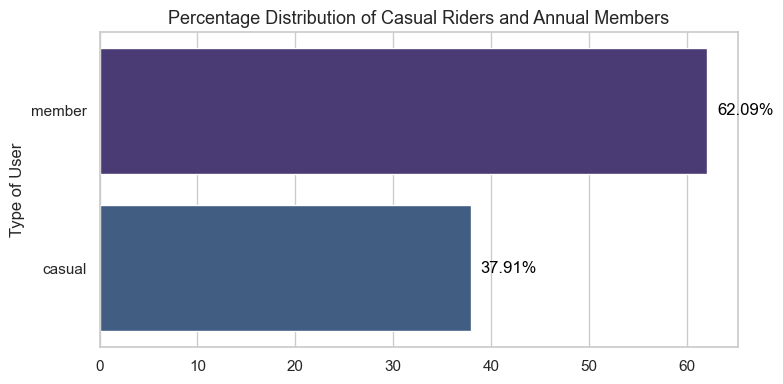

In [18]:
# Compute the percentage distribution of user types (casual riders and members)
percentage_distribution = data['member_casual'].value_counts(normalize=True) * 100

# Create a bar plot to visualize the percentage distribution of user types
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=percentage_distribution.values, y=percentage_distribution.index)

# Add percentage labels to the bars
for index, value in enumerate(percentage_distribution.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, color='black')
    
ax.set_title('Percentage Distribution of Casual Riders and Annual Members')
ax.set_ylabel('Type of User')
plt.tight_layout()
plt.show()

### 4.2. Rides by Day of the Week
The number of rides is plotted based on the day of the week for both casual riders and annual members.

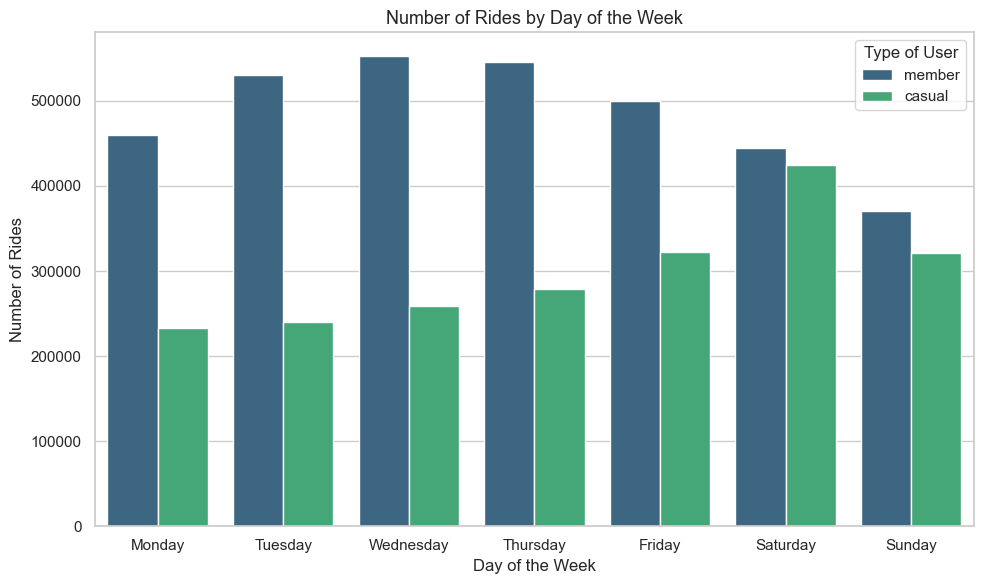

In [19]:
# Define the order of days for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a count plot of rides by day of the week
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='day_of_week', data=data, hue='member_casual', order=day_order, palette='viridis')
ax.set_title('Number of Rides by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Rides')
plt.legend(title='Type of User')
plt.tight_layout()
plt.show()

### 4.3. Rides by Hour of the Day
The number of rides is plotted based on the hour of the day for both casual riders and annual members.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


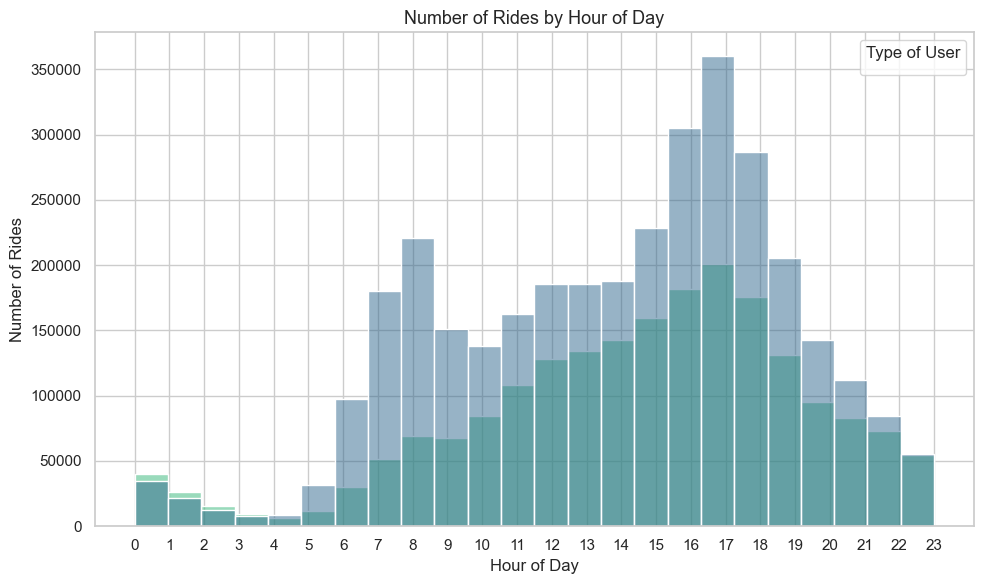

In [20]:
# Create a histogram of rides by hour of the day
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='hour_of_day', bins=24, kde=False, hue='member_casual', palette='viridis')
ax.set_title('Number of Rides by Hour of Day')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.legend(title='Type of User')
plt.tight_layout()
plt.show()

### 4.4. Distribution of Rides Over Time
The overall trend in the distribution of rides over time (dates) is visualized using a line chart.

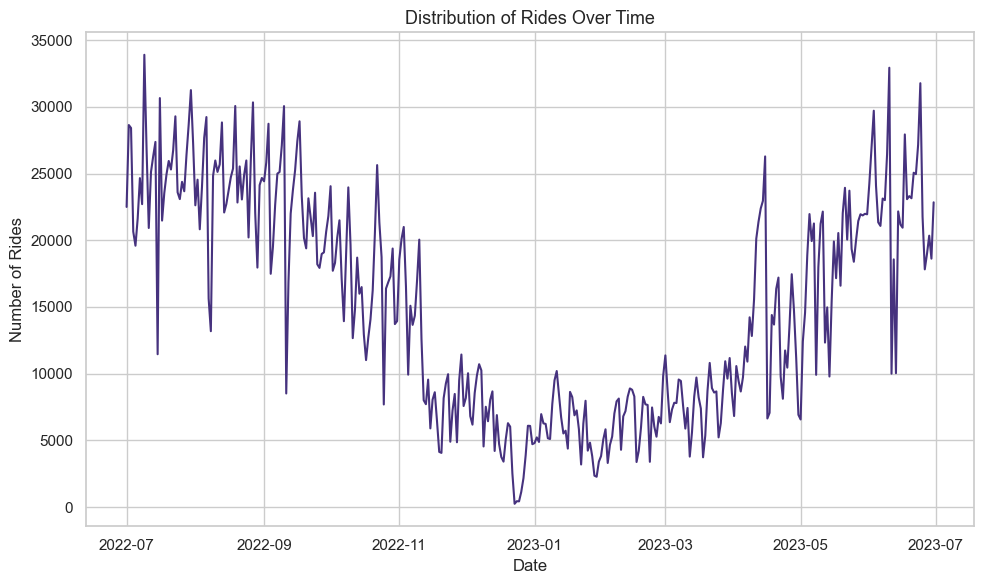

In [21]:
# Group rides by date and count the number of rides on each date
rides_data = data.groupby(data['started_at'].dt.date).size().reset_index(name='count')

# Create a line chart to show the distribution of rides over time
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=rides_data, x='started_at', y='count')
ax.set_title('Distribution of Rides Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rides')
plt.tight_layout()
plt.show()

### 4.5. Average Trip Duration and Distance
The average trip duration and distance traveled are analyzed based on user type.

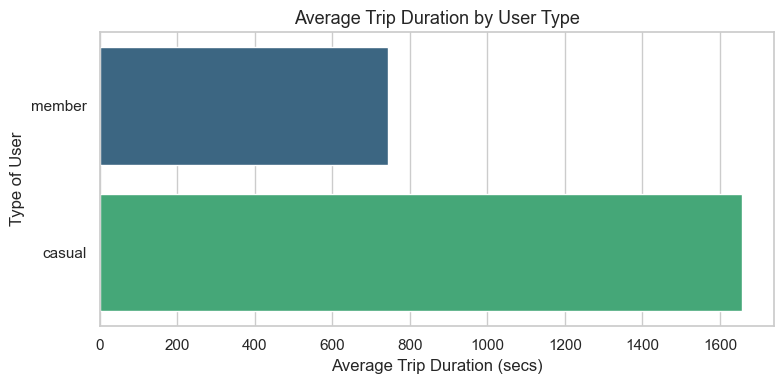

In [22]:
# Create a bar plot of average trip duration by user type
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=data, x='duration', y='member_casual', ci=None, palette='viridis')
ax.set_title('Average Trip Duration by User Type')
ax.set_xlabel('Average Trip Duration (secs)')
ax.set_ylabel('Type of User')
plt.tight_layout()
plt.show()

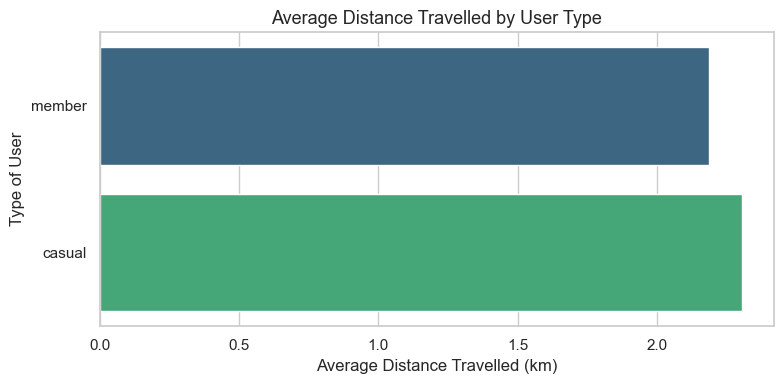

In [23]:
# Create a bar plot of average distance traveled by user type
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=data, x='distance_km', y='member_casual', ci=None, palette='viridis')
ax.set_title('Average Distance Travelled by User Type')
ax.set_xlabel('Average Distance Travelled (km)')
ax.set_ylabel('Type of User')
plt.tight_layout()
plt.show()

### 4.6. Rides by Ride Type
The number of rides is analyzed based on the type of ride (electric bike, classic bike and docked bike) for both casual riders and annual members.

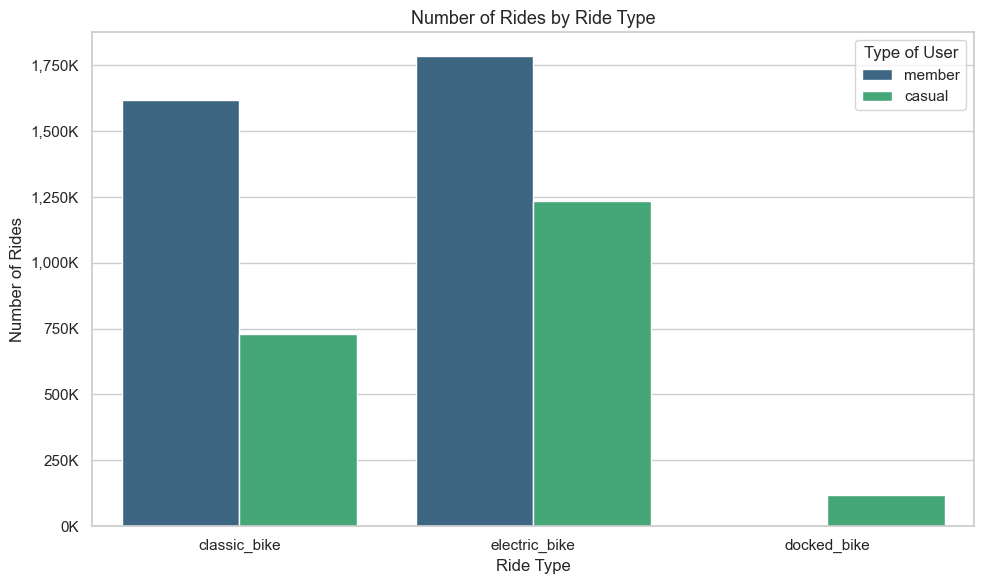

In [24]:
# Create a count plot of rides by ride type and user type
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='rideable_type', hue='member_casual', palette='viridis')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000) + 'K'))
ax.set_title('Number of Rides by Ride Type')
ax.set_xlabel('Ride Type')
ax.set_ylabel('Number of Rides')
plt.legend(title='Type of User')
plt.tight_layout()
plt.show()

### 4.7. Average Duration and Distance by Rideable Type
The average trip duration and distance traveled are analyzed based on ride type and user type.

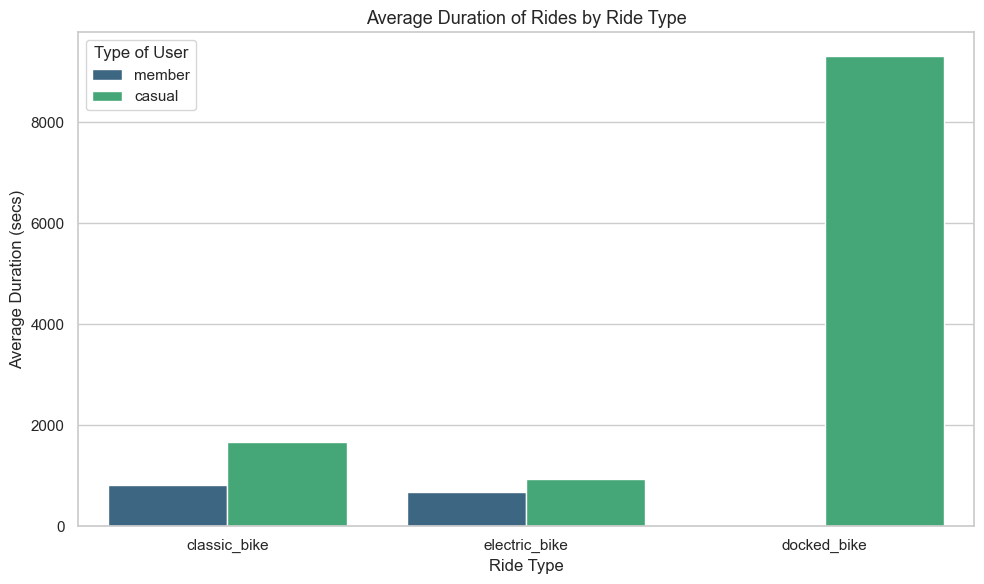

In [25]:
# Create a bar plot of average duration of rides by ride type and user type
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='rideable_type', y='duration', hue='member_casual', ci=None, palette='viridis')
ax.set_title('Average Duration of Rides by Ride Type')
ax.set_xlabel('Ride Type')
ax.set_ylabel('Average Duration (secs)')
plt.legend(title='Type of User')
plt.tight_layout()
plt.show()

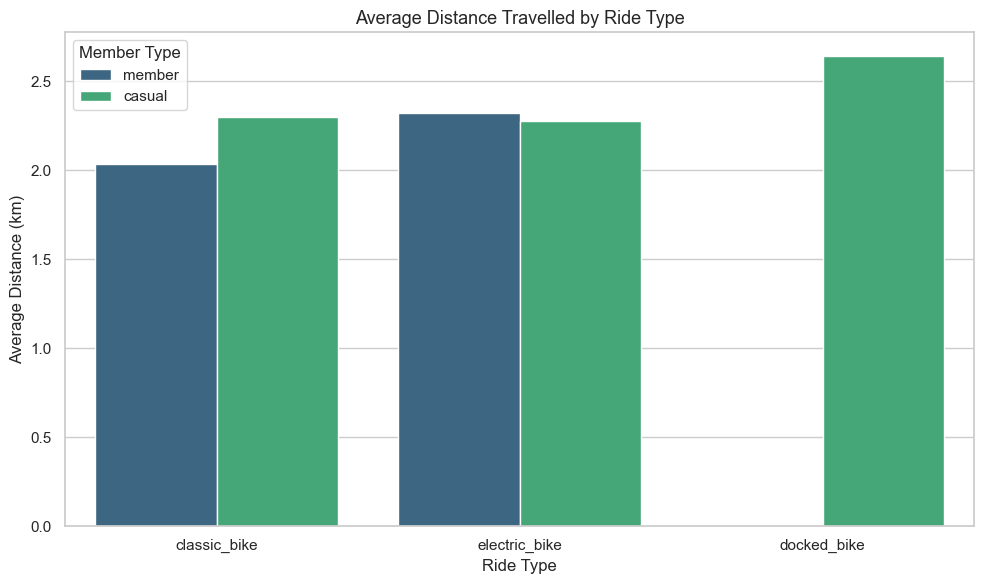

In [26]:
# Create a bar plot of average distance traveled by ride type and user type
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='rideable_type', y='distance_km', hue='member_casual', ci=None, palette='viridis')
ax.set_title('Average Distance Travelled by Ride Type')
ax.set_xlabel('Ride Type')
ax.set_ylabel('Average Distance (km)')
plt.legend(title='Member Type')
plt.tight_layout()
plt.show()

### 4.8. Top Routes
The top 10 routes (start station to end station) for both casual riders and annual members are identified and visualized.

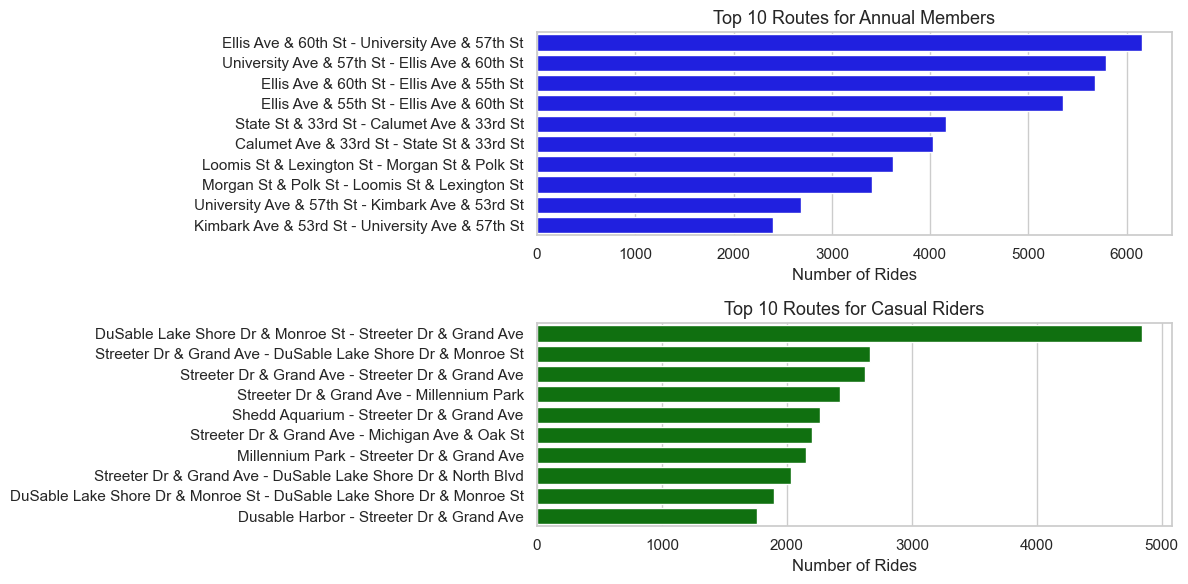

In [27]:
# Get the top 10 routes based on the number of rides for casual riders and annual members
top_routes_casual = data[data['member_casual'] == 'casual']['route'].value_counts().nlargest(10)
top_routes_member = data[data['member_casual'] == 'member']['route'].value_counts().nlargest(10)

# Create separate bar plots for for the top 10 routes of casual riders and members
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.barplot(ax=axes[0], x=top_routes_member.values, y=top_routes_member.index, color='blue')
axes[0].set_xlabel('Number of Rides')
axes[0].set_title('Top 10 Routes for Annual Members')

sns.barplot(ax=axes[1], x=top_routes_casual.values, y=top_routes_casual.index, color='green')
axes[1].set_xlabel('Number of Rides')
axes[1].set_title('Top 10 Routes for Casual Riders')

plt.tight_layout()
plt.show()

### 4.9. Most Active Start Stations
The top 10 most active start stations for both casual riders and annual members are identified and visualized.

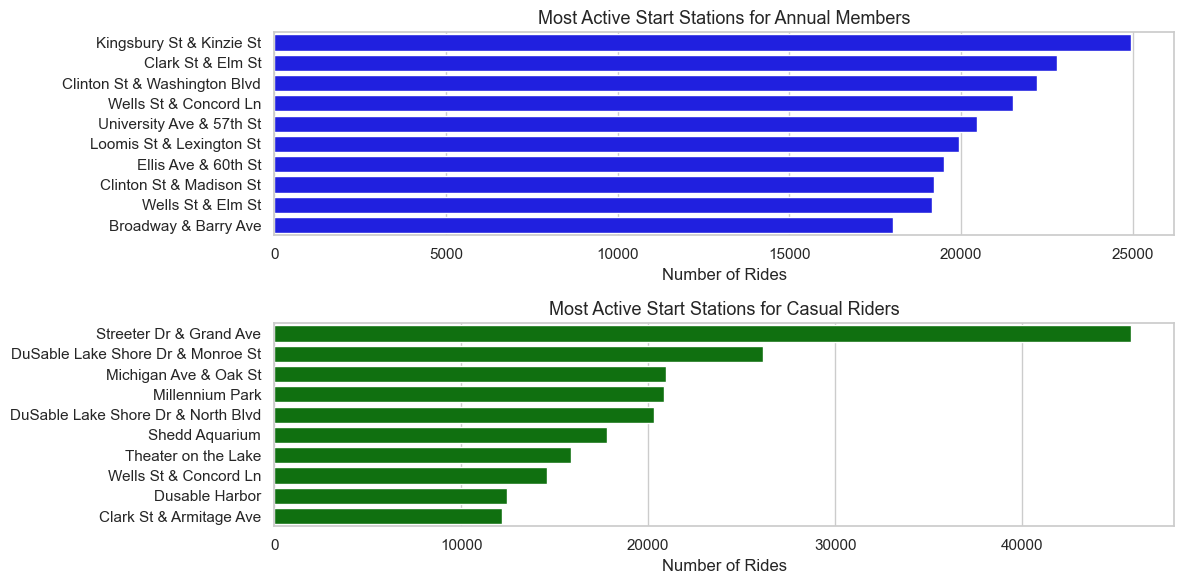

In [27]:
# Get the top 10 start stations based on the number of rides for casual riders and members
start_station_casual = data[data['member_casual'] == 'casual']['start_station_name'].value_counts().nlargest(10)
start_station_member = data[data['member_casual'] == 'member']['start_station_name'].value_counts().nlargest(10)

# Create separate bar plots for the top 10 start stations of casual riders and members
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.barplot(ax=axes[0], x=start_station_member.values, y=start_station_member.index, color='blue')
axes[0].set_xlabel('Number of Rides')
axes[0].set_title('Most Active Start Stations for Annual Members')

sns.barplot(ax=axes[1], x=start_station_casual.values, y=start_station_casual.index, color='green')
axes[1].set_xlabel('Number of Rides')
axes[1].set_title('Most Active Start Stations for Casual Riders')

plt.tight_layout()
plt.show()

### 4.10. Station Location Heatmap
A heatmap is generated to explore the geographic distribution of start stations based on the number of rides.

In [28]:
# Count the number of occurrences of each unique start station name
station_count = data['start_station_name'].value_counts().reset_index()
station_count.columns = ['start_station_name', 'count']

# Group the data by start station name and calculate the mean latitude and longitude
station_location = data.groupby('start_station_name').agg({
    'start_lat': 'mean',
    'start_lng': 'mean'
}).reset_index()

# Combine the station count and location dataframes based on start station name
location_data = pd.merge(station_count, station_location, on='start_station_name')

In [29]:
# Calculate the mean latitude and longitude
mean_lat = location_data['start_lat'].mean()
mean_lng = location_data['start_lng'].mean()

# Create a folium map centered around the mean latitude and longitude
m = folium.Map(location=[mean_lat, mean_lng], zoom_start=12)

# Convert the 'start_lat', 'start_lng', and 'count' columns to lists
latitudes = location_data['start_lat'].tolist()
longitudes = location_data['start_lng'].tolist()
counts = location_data['count'].tolist()

# Create a list of tuples for HeatMap
heat_data = [[lat, lon, count] for lat, lon, count in zip(latitudes, longitudes, counts)]

# Add the HeatMap layer to the map
HeatMap(heat_data, radius=15, blur=20).add_to(m)

# Display the map
m

## 5. A/B Testing for Different Bike Types

Cyclistic wants to replace many of their worn out bikes and introduce a new fleet of bikes. The director of marketing is interested in optimizing the types of bikes offered to customers. She believes that introducing more electric bikes rather than the traditional pedal bikes could attract more riders and increase ride frequency. To validate this hypothesis, an A/B test is required to gain insights into rider preferences.

To design and conduct a two sample t-test, we'll have to state the null and alternative hypothesis:

- **Null Hypothesis (H0)**: The average ride frequency for electronic bikes is the same as that for traditional pedal bikes.
- **Alternative Hypothesis (Ha):** The average ride frequency for electronic bikes is higher than that for traditional pedal bikes.

For experimental design, users would be assigned to two groups:

1. **Treatment Group (A):** Users assigned to the treatment group will have access to only electronic bikes for their rides.
2. **Control Group (B):** Users in the control group will have access to traditional pedal (classic and docked) bikes only.

In [30]:
# Filter the dataframe for electric bike trips
electric_df = data[data['rideable_type'] == 'electric_bike']

# Filter the dataframe for pedal bike trips
pedal_df = data[data['rideable_type'].isin(['classic_bike', 'docked_bike'])]

# Create two dataframes with date counts for electric bikes and pedal bikes
electric_rides = electric_df['started_at'].dt.date.value_counts().reset_index()
electric_rides.columns = ['date', 'count']

pedal_rides = pedal_df['started_at'].dt.date.value_counts().reset_index()
pedal_rides.columns = ['date', 'count']

In real world scenarios, collecting data from an entire population can be time-consuming, expensive or sometimes impossible. So, we can take a representative subset of the population to estimate population characteristics and draw inferences. For this task, we use a 95% confidence level in our results to determine the sample size.

Yamane's formula is a widely used formula to calculate the sample size. The formula is given by:

n = N/1+N(e^2)

where:

n is the sample size,
N is the population size, and
e is the sampling error.

For a 95% confidence level, e is given as  0.05 which corresponds to a 5% level of precision.

In [31]:
# Calculate the sample size using Yamane's formula
N = len(electric_rides)
e = 0.05

sample_size = N / (1 + N * (e ** 2))
print('Sample size:', round(sample_size))

Sample size: 191


In [32]:
# Generate a random sample of dates in the dataframes
sample_dates = electric_rides['date'].sample(n=191, random_state=42).tolist()

# Filter both dataframes to include only the random sample of dates
electric_sample = electric_rides[electric_rides['date'].isin(sample_dates)]
pedal_sample = pedal_rides[pedal_rides['date'].isin(sample_dates)]

Next, we choose a significance level. A significance level of 5% was chosen to represent the threshold used to determine whether the results of a statistical test are considered statistically significant or not.

Then, we find the p-value.

In [33]:
# Assign electric_rides to treatment group, pedal_rides to control group and perform the two-sample t-test
t_stat, p_value = ttest_ind(electric_sample['count'], pedal_sample['count'], equal_var=False)

# Print the results
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 3.9155836807369515
P-value: 0.00010726264905581477


Since the p-value is significantly smaller than the significance level of 5%, there is a statistically significant difference between the groups. Therefore, we reject the null hypothesis.

We can then conclude that the average ride frequency for electronic bikes is higher than that for traditional pedal bikes.

## 6. Time Series Analysis with SARIMA (Seasonal Autoregressive Integrated Moving Average)

In this section of the project, we'll be conducting a time series analysis using the Seasonal Autoregressive Integrated Moving Average (SARIMA) model. We are going to model the trend and seasonality of the time series data representing the number of cyclistic rides over a period of time. The goal of this analysis is to forecast the future number of bike rides based on historical data.

### 6.1. Data Preparation

First, let's start by loading the dataset and performing initial data exploration:

In [34]:
# Peek the first 10 rows of the data
rides_data.head(10)

,started_at,count
0,2022-07-01,22499
1,2022-07-02,28638
2,2022-07-03,28417
3,2022-07-04,20644
4,2022-07-05,19593
5,2022-07-06,21635
6,2022-07-07,24659
7,2022-07-08,22707
8,2022-07-09,33904
9,2022-07-10,26873


The dataset has a date column, which we will convert into the index. We'll also resample the dataframe to a daily frequency.

In [35]:
# Convert the 'started_at' column to the index
rides_data.set_index('started_at', inplace=True)

# Resample the dataframe to daily frequency
rides_data = rides_data.asfreq('D')

### 6.2. Visualizing the Data
Let's plot the original time series data to visualize the ride counts over time:

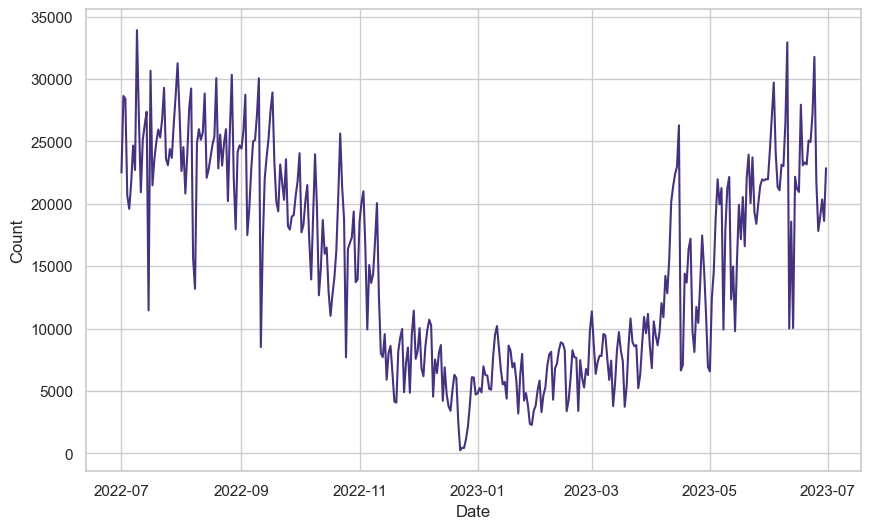

In [36]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rides_data.index, rides_data['count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

### 6.3. Exploratory Data Analysis
We'll compute rolling statistics (rolling mean and rolling standard deviation) and plot them along with the original data to identify trends and seasonality:

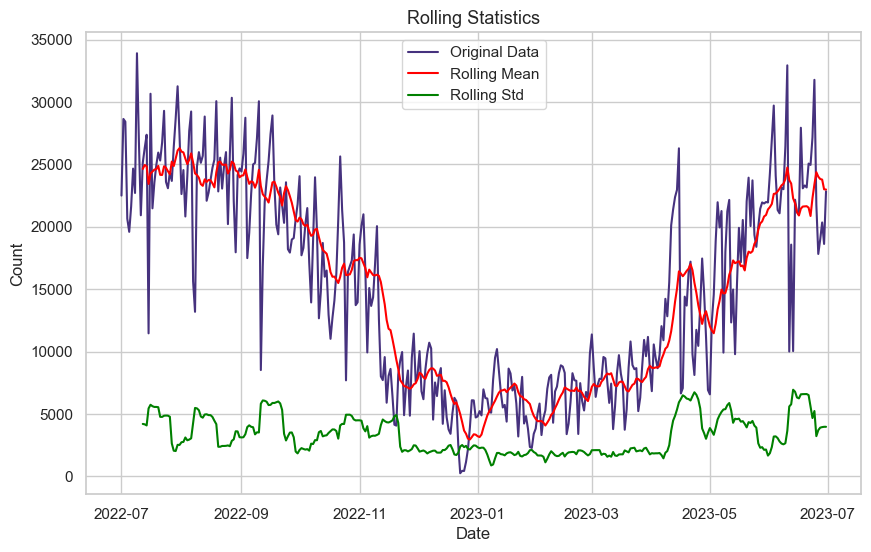

In [37]:
# Compute rolling statistics
rolling_mean = rides_data['count'].rolling(window=12).mean()
rolling_std = rides_data['count'].rolling(window=12).std()

# Plot the original data and rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(rides_data.index, rides_data['count'], label='Original Data')
plt.plot(rides_data.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(rides_data.index, rolling_std, label='Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Rolling Statistics')
plt.legend()
plt.show()

### 6.4. Stationarity Test
We'll perform the Augmented Dickey-Fuller test to determine if the time series is stationary. The null hypothesis of this test is that the time series is non-stationary. We'll interpret the results based on the p-value:

In [38]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(rides_data['count'])

# Extract and print the ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.0771426503908388
p-value: 0.7241005553582568
Critical Values: {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}


In [39]:
# Interpret the results
if result[1] <= 0.05:
    print('Reject the null hypothesis (H0): The data is stationary.')
else:
    print('Fail to reject the null hypothesis (H0): The data is not stationary.')

Fail to reject the null hypothesis (H0): The data is not stationary.


### 6.5. Differencing
Differencing is a common technique used to make a time series stationary. We'll plot the original data and the seasonally differenced data:

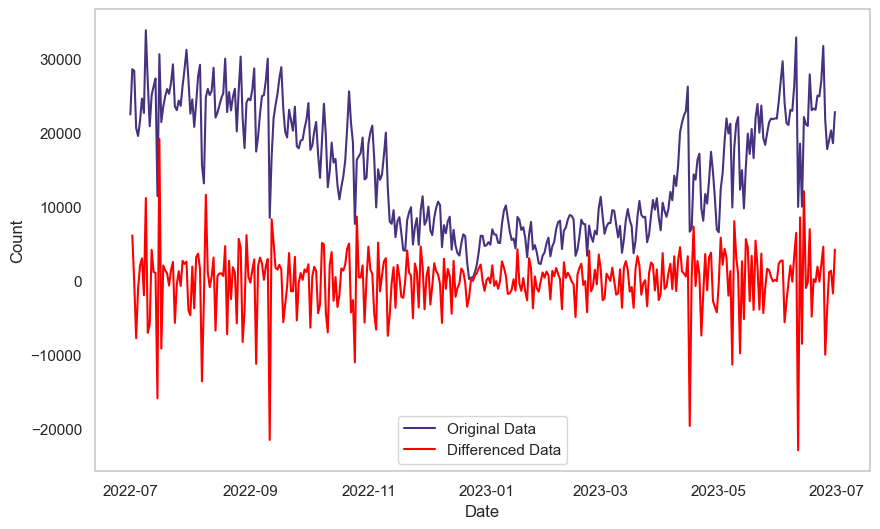

In [40]:
# Apply differencing
rides_data['first_diff'] = rides_data['count'] - rides_data['count'].shift(1)

# Plot the original data and the seasonally differenced data
plt.figure(figsize=(10, 6))
plt.plot(rides_data.index, rides_data['count'], label='Original Data')
plt.plot(rides_data.index, rides_data['first_diff'], label='Differenced Data', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.show()

We'll perform the ADF test again on the differenced data to check for stationarity:

In [41]:
# Perform the ADF test after differencing
result = adfuller(rides_data['first_diff'].dropna())

# Print ADF test results
print('ADF Test After Seasonal Differencing:')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
print('Is the data stationary (p-value <= 0.05)?', result[1] <= 0.05)

ADF Test After Seasonal Differencing:
ADF Statistic: -6.889119573010111
p-value: 1.3700708491925175e-09
Critical Values: {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}
Is the data stationary (p-value <= 0.05)? True


### 6.6. Seasonal Decomposition
We can also perform seasonal decomposition to separate the time series into its trend, seasonality and residual components:

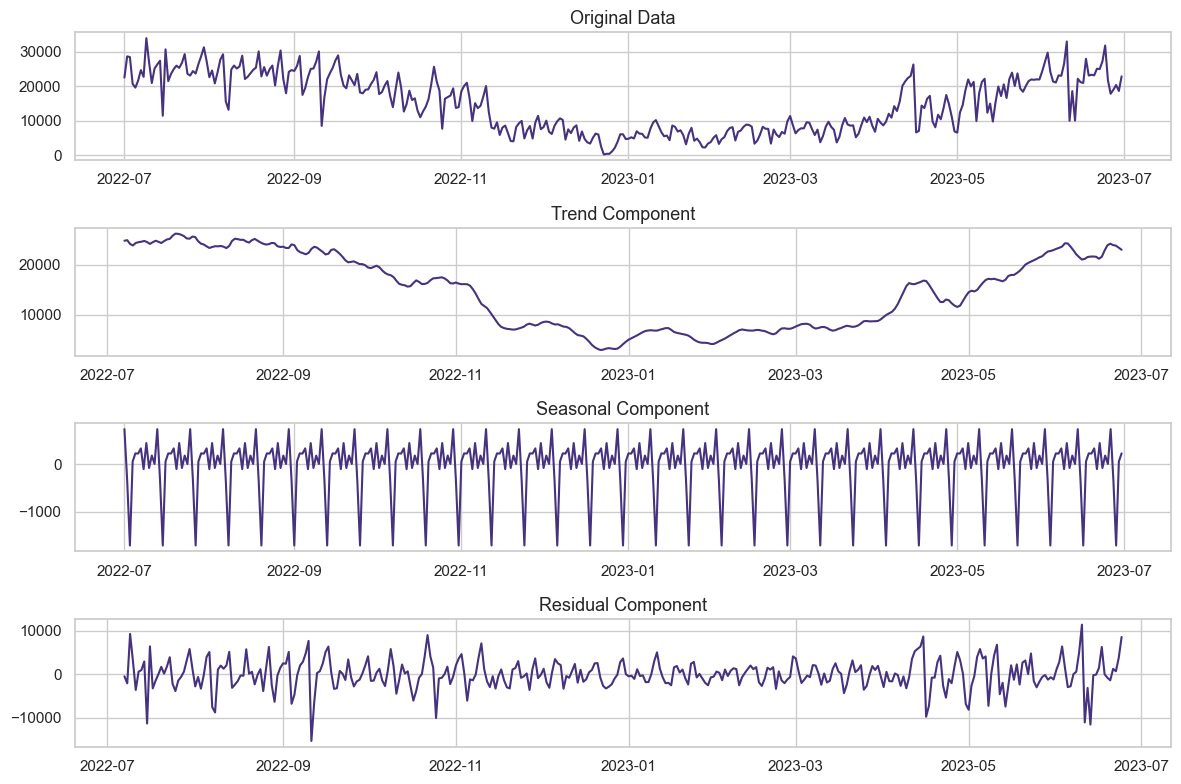

In [42]:
# Perform seasonal decomposition
result = seasonal_decompose(rides_data['count'], model='additive', period=12)

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(rides_data.index, rides_data['count'])
plt.title('Original Data')
plt.subplot(4, 1, 2)
plt.plot(rides_data.index, result.trend)
plt.title('Trend Component')
plt.subplot(4, 1, 3)
plt.plot(rides_data.index, result.seasonal)
plt.title('Seasonal Component')
plt.subplot(4, 1, 4)
plt.plot(rides_data.index, result.resid)
plt.title('Residual Component')
plt.tight_layout()
plt.show()

Residuals are extracted from the decomposition and tested for stationarity using the ADF test:

In [43]:
# Extract the residuals
residuals = result.resid.dropna()

# Perform the ADF test on the residuals
adf_result = adfuller(residuals)

# Print ADF test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])
print('Is the residual data stationary (p-value <= 0.05)?', adf_result[1] <= 0.05)

ADF Statistic: -7.843882378987728
p-value: 5.838759201036153e-12
Critical Values: {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}
Is the residual data stationary (p-value <= 0.05)? True


### 6.7. Autocorrelation and Partial Autocorrelation
We'll plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to identify potential AR and MA orders for the ARIMA model.

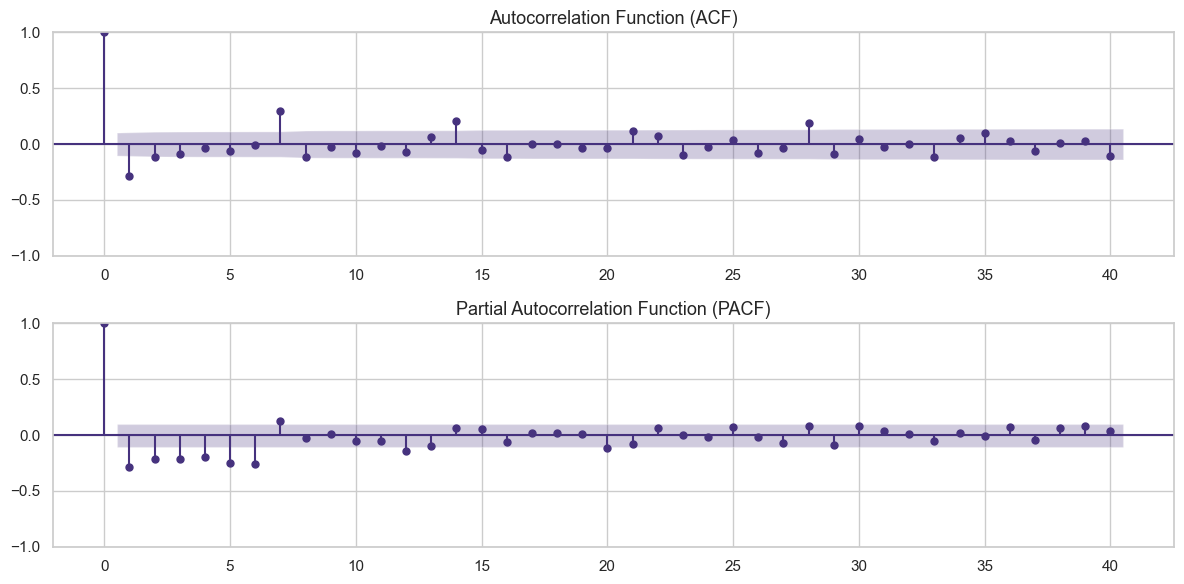

In [44]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(rides_data['first_diff'].dropna(), lags=40, ax=plt.gca(), title='Autocorrelation Function (ACF)')
plt.subplot(2, 1, 2)
plot_pacf(rides_data['first_diff'].dropna(), lags=40, method='ywm', ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

The ACF and PACF plots help identify potential values for the order of autoregressive (p) and moving average (q) terms in the ARIMA model. However, they do not provide a definitive answer about the optimal values. Multiple combinations of p and q seem plausible based on these plots and so, choosing the right values based solely on these plots might lead to suboptimal results. We'll look at a powerful tool for selecting the combination that yields the best performance on a chosen evaluation metric.

### 6.8. Grid Search (Hyperparameter Optimization)
We'll perform a grid search to find the optimal parameters for the SARIMA model using the AIC (Akaike Information Criterion) score. The combination that yields the lowest AIC score will be selected for our model:

In [45]:
# Define the parameter combinations to search over
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
seasonal_p_values = [0, 1]
seasonal_d_values = [0, 1]
seasonal_q_values = [0, 1]
seasonal_m_values = [12]

# Initialize variables to store the best model and AIC score
best_model = None
best_aic = float('inf')

# Iterate through and fit a seaosonal ARIMA model with all combinations of parameters
for p, d, q, P, D, Q, m in product(p_values, d_values, q_values, seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m_values):
    try:
        model = sm.tsa.SARIMAX(rides_data['count'], order=(p, d, q), seasonal_order=(P, D, Q, m))
        results = model.fit()
        
        aic = results.aic
        
        if aic < best_aic:
            best_aic = aic
            best_model = model
            best_params = (p, d, q, P, D, Q, m)
            
    except Exception as e:
        continue
        
# Print the optimal parameter values
print('Optimal Parameters:', best_params)
print('AIC Score:', best_aic)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Lik

Optimal Parameters: (2, 1, 2, 0, 1, 1, 12)
AIC Score: 6846.688091524775


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 6.9. Model Fitting and Evaluation
The best model is fitted using the optimal parameters - (2, 1, 2) x (0, 1, 1, 12):

In [46]:
# Fit the best model with the optimal parameters
final_model = sm.tsa.SARIMAX(rides_data['count'], order=best_params[:3], seasonal_order=best_params[3:])
final_results = final_model.fit()

# Print the summary of the final model
print(final_results.summary())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:                                count   No. Observations:                  365
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -3417.344
Date:                              Fri, 11 Aug 2023   AIC                           6846.688
Time:                                      23:29:04   BIC                           6869.870
Sample:                                  07-01-2022   HQIC                          6855.913
                                       - 06-30-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9339      0.232      4.025      0.000       0.479       1.389
ar.L2         -0.38

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean.

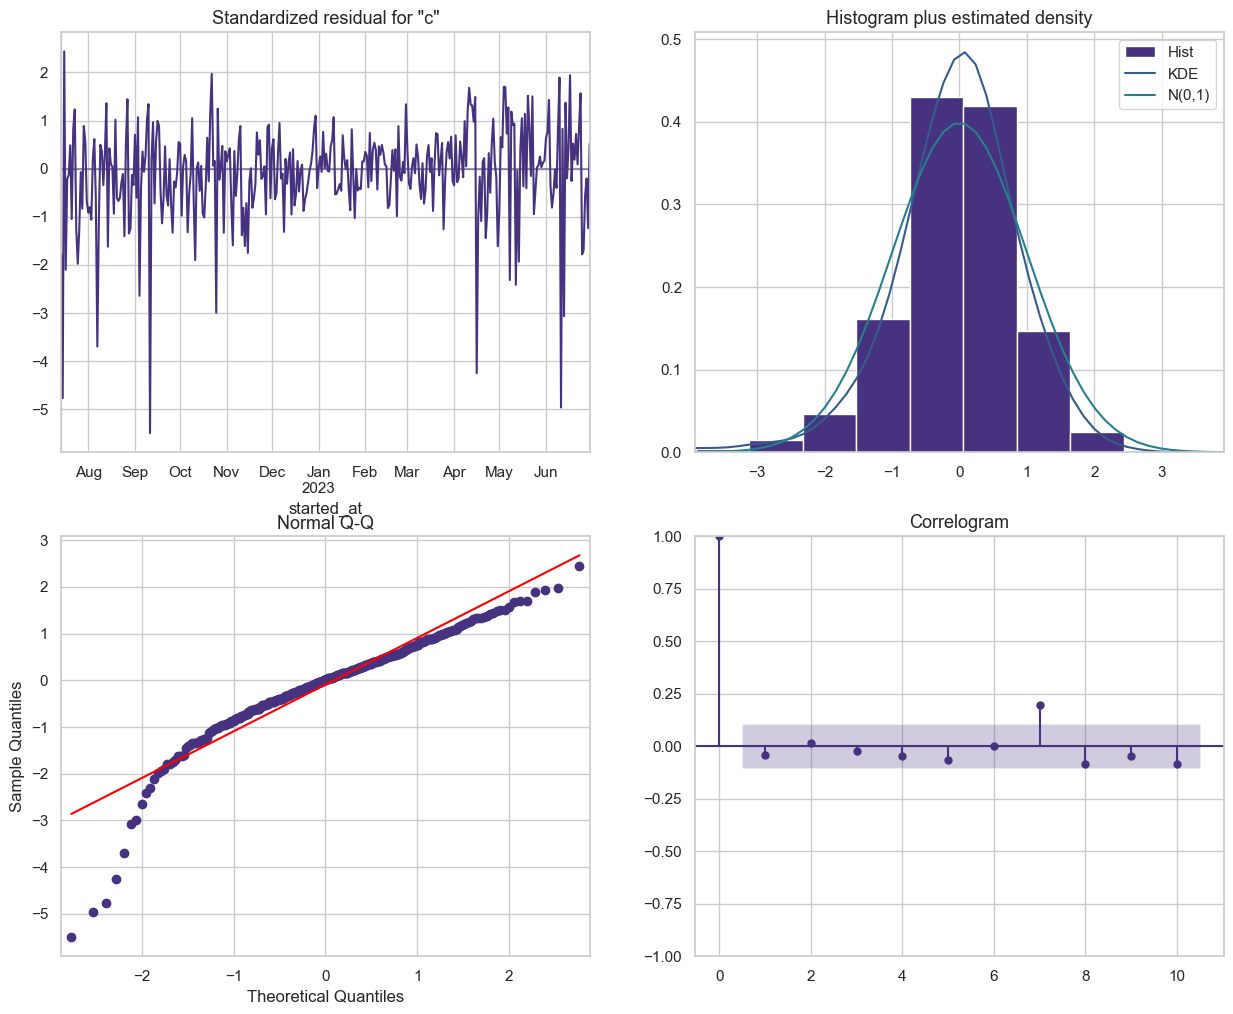

In [47]:
# Plot the model's diagnostics
final_results.plot_diagnostics(figsize=(15, 12))
plt.show()

The observations from our plot leads us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

### 6.10. Forecasting
Predictions for future time points are generated with a 95% confidence level using the fitted model:

In [48]:
# Get predictions for 60 future time points using the fitted model (with 95% confidence level)
forecast_steps = 60
forecast = final_results.get_prediction(start=rides_data.index[0], end=rides_data.index[-1] + pd.Timedelta(days=forecast_steps - 1), alpha=0.05)

# Extract the forecasted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Add the forecasted values to the dataframe
rides_data['sarimax_pred'] = forecast_mean

# Add the upper and lower limit columns for the confidence intervals
rides_data['sarimax_ci_upper'] = forecast_ci['upper count']
rides_data['sarimax_ci_lower'] = forecast_ci['lower count']

# Print the dataframe with the SARIMAX predictions and confidence intervals
print(rides_data)

            count  first_diff  sarimax_pred  sarimax_ci_upper  \
started_at                                                      
2022-07-01  22499         NaN      0.000000      12030.464640   
2022-07-02  28638      6139.0  17611.336060      29189.777265   
2022-07-03  28417      -221.0  21724.803257      32969.654380   
2022-07-04  20644     -7773.0  22233.525286      33239.854211   
2022-07-05  19593     -1051.0  18540.130058      29409.616361   
...           ...         ...           ...               ...   
2023-06-26  17820     -3948.0  24341.694001      31871.289952   
2023-06-27  18983      1163.0  21144.619315      28673.960561   
2023-06-28  20344      1361.0  21131.279103      28660.486058   
2023-06-29  18622     -1722.0  23374.926064      30904.005273   
2023-06-30  22845      4223.0  20866.933829      28395.926848   

            sarimax_ci_lower  
started_at                    
2022-07-01     -12030.464640  
2022-07-02       6032.894856  
2022-07-03      10479.952134  

The original time series, predicted values and the 95% confidence interval are plotted for visualization:

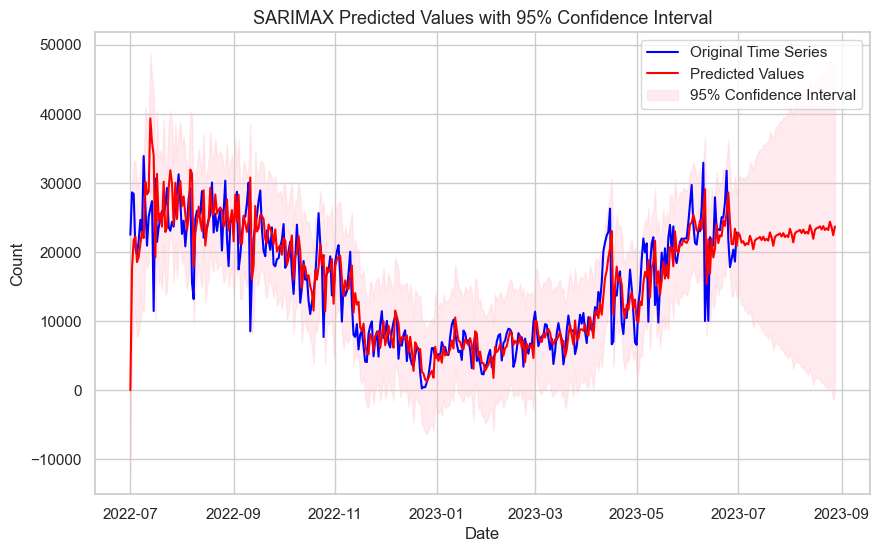

In [49]:
# Plot the original time series, predicted values and the 95% confidence interval
plt.figure(figsize=(10, 6))
plt.plot(rides_data.index, rides_data['count'], label='Original Time Series', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Predicted Values', color='red')
plt.fill_between(forecast_ci.index, forecast_ci['lower count'], forecast_ci['upper count'], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('SARIMAX Predicted Values with 95% Confidence Interval')
plt.legend()
plt.show()

The documentation provides a comprehensive overview of the entire SARIMA analysis process, from data preparation to model fitting and result visualization. The provided comments in Markdown format serve as explanatory aids, making it easier for readers to follow the analysis process, interpret results and reproduce the analysis on their own.